In [126]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# imputing missing values
import missingno as msno

# reading files from local system
from google.colab import files
uploaded = files.upload()
import io

# spliting datasets
from sklearn.model_selection import train_test_split

# getting dummy variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# standardizing dataset
from sklearn.preprocessing import StandardScaler

In [127]:
# read csv files
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [128]:
#missing values
dataset.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [129]:
#split dataset into X and Y
X = dataset.iloc[:,1].values
Y = dataset.iloc[:, -1].values

X = X.reshape(len(X),1)
Y = Y.reshape(len(Y),1)

In [130]:
#fit dataset into decision tree regression
dst = DecisionTreeRegressor(random_state = 0)
dst.fit(X, Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [131]:
#predict salary at 6.5 job level
dst.predict([[6.5]])

array([150000.])

Text(0, 0.5, 'Salary')

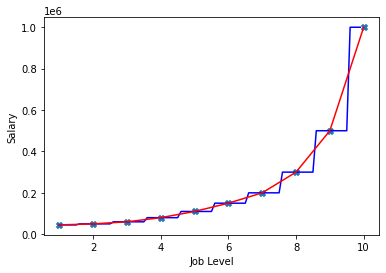

In [143]:
#visualize the decision tree regression
X_smooth = np.arange(min(X), max(X), 0.1)
X_smooth = X_smooth.reshape(len(X_smooth),1)

fig, ax = plt.subplots()

#actual data
ax.scatter(X, Y, marker='X')

#higher resolution
ax.plot(X_smooth, dst.predict(X_smooth), color = 'blue')

#original resolution
ax.plot(X, dst.predict(X), color = 'red')

ax.set_xlabel('Job Level')
ax.set_ylabel('Salary')                         